# Capstone Project - The Battle of Neighborhoods

## Part 1: Data about Districts in Singapore

In [2]:
import numpy as np # library to handle data in a vectorized manner
import bs4 
from urllib.request import urlopen
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Libraries imported.")

Libraries imported.


In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore')[2]

In [4]:
df

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000
5,Bukit Merah,*,红山,Hóng shān,புக்கிட் மேரா,Central,14.34,151980,11000
6,Bukit Panjang,*,武吉班让,Wǔjí bān ràng,பக்கிட் பஞ்சாங்,West,8.99,139280,15000
7,Bukit Timah,*,武吉知马,Wǔjí zhī mǎ,புக்கித் திமா,Central,17.53,77430,4400
8,Central Water Catchment,Kawasan Tadahan Air Tengah,中央集水区,Zhōngyāng jí shuǐ qū,மத்திய நீர் நீர்ப்பிடிப்பு,North,37.15,*,*
9,Changi,*,樟宜,Zhāng yí,சாங்கி,East,40.61,1830,80.62


In [5]:
df = df.drop(columns=['Malay', 'Chinese', 'Pinyin','Tamil'])

In [6]:
df.shape

(55, 5)

In [7]:
df.head()

,Name (English),Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,North-East,13.94,163950,13400
1,Bedok,East,21.69,279380,13000
2,Bishan,Central,7.62,88010,12000
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,153740,14000


# Part 2: Geospatial data from Foursquare

In [8]:
!pip install folium

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 5.7 MB/s  eta 0:00:01
Libraries imported.


### Let's get the geographical coordinates of Singapore

In [12]:
address = 'Singapore'

geolocator = Nominatim(user_agent="Singapore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [13]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Singapore_explorer")

df['Major_Dist_Coord']= df['Name (English)'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Name (English),Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523
1,Bedok,East,21.69,279380,13000,1.323976,103.930216
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591
5,Bukit Merah,Central,14.34,151980,11000,4.561694,101.024037
6,Bukit Panjang,West,8.99,139280,15000,1.379149,103.761413
7,Bukit Timah,Central,17.53,77430,4400,1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,1830,80.62,43.880078,126.564903


# Part 3: Clustering Neighbourhoods in Singapore

In [14]:
# create map of Singapore  using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name (English)']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore) 
    
map_singapore

In [15]:
CLIENT_ID = '30RRVFIONTGST03WGIGCFOL2UYNQNKL0PQRVJYJVIKRPIUYH' # your Foursquare ID
CLIENT_SECRET = 'IJTJPB5POS0NOCJ4WTHLXQAQOHSE5TKCKBYZJXW3GSFN5PWW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 30RRVFIONTGST03WGIGCFOL2UYNQNKL0PQRVJYJVIKRPIUYH
CLIENT_SECRET:IJTJPB5POS0NOCJ4WTHLXQAQOHSE5TKCKBYZJXW3GSFN5PWW


In [16]:
df.loc[0, 'Name (English)']

'Ang Mo Kio'

### Part 3A: Show the top 15 venues around Ang Mo Kio

In [18]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name (English)'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ang Mo Kio are 1.3700803, 103.8495228.


In [19]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=30RRVFIONTGST03WGIGCFOL2UYNQNKL0PQRVJYJVIKRPIUYH&client_secret=IJTJPB5POS0NOCJ4WTHLXQAQOHSE5TKCKBYZJXW3GSFN5PWW&v=20180604&ll=1.3700803,103.8495228&radius=600&limit=15'

In [20]:
results = requests.get(url).json()

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

print('Completed.')

Completed.


In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,FairPrice Xtra,Supermarket,1.369279,103.848886
1,Old Chang Kee,Snack Place,1.369094,103.848389
2,MOS Burger,Burger Joint,1.369170,103.847831
3,NTUC FairPrice,Supermarket,1.371507,103.847082
4,Pepper Lunch,Japanese Restaurant,1.369107,103.847791


In [27]:
print ('{} unique categories in Ang Mo Kio.'.format(nearby_venues['categories'].value_counts().shape[0]))

12 unique categories in Ang Mo Kio.


In [28]:
print (nearby_venues['categories'].value_counts()[0:15])

Coffee Shop             3
Supermarket             2
Japanese Restaurant     1
Snack Place             1
Bubble Tea Shop         1
Burger Joint            1
Noodle House            1
Asian Restaurant        1
Miscellaneous Shop      1
Gym / Fitness Center    1
Chinese Restaurant      1
Fast Food Restaurant    1
Name: categories, dtype: int64


In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [35]:
Singapore_venues = getNearbyVenues(names=df['Name (English)'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [36]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Singapore_Venues_only_restaurant = Singapore_venues[Singapore_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Singapore_Venues_only_restaurant.index = np.arange(1, len(Singapore_Venues_only_restaurant )+1)

In [37]:
print (Singapore_Venues_only_restaurant['Venue Category'].value_counts())

Chinese Restaurant                 208
Japanese Restaurant                109
Fast Food Restaurant                88
Asian Restaurant                    82
Indian Restaurant                   71
Italian Restaurant                  69
Thai Restaurant                     59
Seafood Restaurant                  54
Restaurant                          49
Vegetarian / Vegan Restaurant       42
Sushi Restaurant                    32
French Restaurant                   20
Hotpot Restaurant                   20
American Restaurant                 20
Korean Restaurant                   19
Dim Sum Restaurant                  18
Dumpling Restaurant                 14
Vietnamese Restaurant               14
Indonesian Restaurant               12
Malay Restaurant                    12
Spanish Restaurant                  11
Hainan Restaurant                   10
Modern European Restaurant          10
Cantonese Restaurant                 9
Ramen Restaurant                     8
Halal Restaurant         

In [38]:
print('There are {} uniques categories.'.format(len(Singapore_Venues_only_restaurant['Venue Category'].unique())))

There are 57 uniques categories.


In [39]:
# create a dataframe of top 10 categories
Singapore_5_Dist_Venues_Top10 = Singapore_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Singapore_5_Dist_Venues_Top10= Singapore_5_Dist_Venues_Top10.reset_index()
#Singapore_5_Dist_Venues_Top10

Singapore_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Singapore_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Chinese Restaurant,208
1,Japanese Restaurant,109
2,Fast Food Restaurant,88
3,Asian Restaurant,82
4,Indian Restaurant,71
5,Italian Restaurant,69
6,Thai Restaurant,59
7,Seafood Restaurant,54
8,Restaurant,49
9,Vegetarian / Vegan Restaurant,42


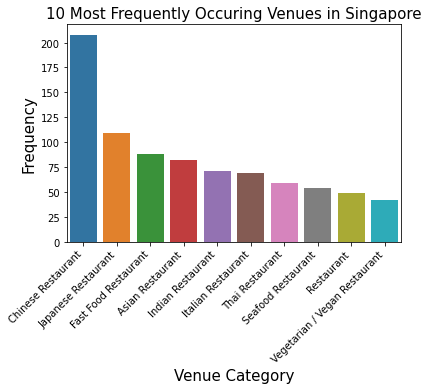

<Figure size 1296x504 with 0 Axes>

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Singapore_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Singapore', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [45]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Singapore_Venues_only_restaurant.shape)
Singapore_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (1145, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ang Mo Kio,1.370080,103.849523,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant
2,Ang Mo Kio,1.370080,103.849523,Nic & Tom Eatery,1.363508,103.865735,Chinese Restaurant
3,Ang Mo Kio,1.370080,103.849523,Sin Ming Roti Prata (Faisal & Aziz Curry Musli...,1.355269,103.836719,Indian Restaurant
4,Ang Mo Kio,1.370080,103.849523,龍海鮮螃蟹王 Mellben Seafood,1.368324,103.836764,Seafood Restaurant
5,Ang Mo Kio,1.370080,103.849523,Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐,1.371975,103.846408,Chinese Restaurant
6,Ang Mo Kio,1.370080,103.849523,Pepper Lunch,1.369107,103.847791,Japanese Restaurant
7,Ang Mo Kio,1.370080,103.849523,香记粥 (Xiang Ji Porridge),1.381202,103.840782,Chinese Restaurant
8,Ang Mo Kio,1.370080,103.849523,Casa Manini,1.365261,103.866243,Italian Restaurant
9,Ang Mo Kio,1.370080,103.849523,Tomyum Mama,1.353415,103.834441,Thai Restaurant
10,Ang Mo Kio,1.370080,103.849523,Lao San Kway Chap 老三棵汁·猪什汤,1.367916,103.837008,Chinese Restaurant


In [41]:
Singapore_Venues_restaurant = Singapore_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [44]:
Singapore_Venues_restaurant

Neighborhood
Ang Mo Kio                 37
Bedok                      43
Bishan                     30
Boon Lay                   25
Bukit Batok                40
Bukit Merah                15
Bukit Panjang              27
Bukit Timah                29
Central Water Catchment     4
Changi                      2
Choa Chu Kang              14
Clementi                   34
Downtown Core              16
Geylang                    41
Hougang                    27
Jurong East                36
Jurong West                26
Kallang                    30
Lim Chu Kang                3
Marina East                15
Marina South               17
Marine Parade              37
Novena                     24
Outram                     24
Pasir Ris                  26
Paya Lebar                 41
Punggol                    29
Queenstown                 14
River Valley               22
Rochor                     18
Seletar                    33
Sembawang                  38
Sengkang                   

In [47]:
Singapore_Venues_restaurant_df  = Singapore_Venues_restaurant.to_frame().reset_index()
Singapore_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Singapore_Venues_restaurant_df.index = np.arange(1, len(Singapore_Venues_restaurant_df)+1)
list_rest_no = Singapore_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Singapore_Venues_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

In [59]:
# one hot encoding
Singapore_onehot = pd.get_dummies(Singapore_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Singapore_onehot['Neighborhood'] = Singapore_Venues_only_restaurant['Neighborhood'] 

Singapore_onehot.head()

,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ang Mo Kio


In [60]:
# move neighborhood column to the front
fixed_columns = [Singapore_onehot.columns[-1]] + list(Singapore_onehot.columns[:-1])
Singapore_onehot = Singapore_onehot[fixed_columns]

Singapore_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Ang Mo Kio,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Ang Mo Kio,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# get new dataframe size
Singapore_onehot.shape

(1145, 58)

In [62]:
## Now, we will group rows by neighborhood and show the mean of frequency occuring for each category of restaurants
Singapore_grouped = Singapore_onehot.groupby('Neighborhood').mean().reset_index()
Singapore_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Australian Restaurant,Cantonese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Dumpling Restaurant,English Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Fujian Restaurant,German Restaurant,Greek Restaurant,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Peking Duck Restaurant,Persian Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Ang Mo Kio,0.000000,0.081081,0.000000,0.000000,0.351351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.081081,0.000000,0.108108,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,0.000000,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.054054,0.027027,0.000000,0.000000,0.081081,0.000000,0.027027,0.000000
1,Bedok,0.046512,0.139535,0.000000,0.000000,0.302326,0.023256,0.000000,0.000000,0.000000,0.069767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.069767,0.023256,0.023256,0.000000,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116279,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046512,0.000000,0.046512,0.000000
2,Bishan,0.000000,0.100000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
3,Boon Lay,0.000000,0.120000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.080000,0.000000,0.000000,0.040000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
4,Bukit Batok,0.025000,0.050000,0.000000,0.000000,0.275000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.025000,0.100000,0.000000,0.075000,0.000000,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.075000,0.000000
5,Bukit Merah,0.000000,0.266667,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [63]:
# checking the size 
Singapore_grouped.shape

(45, 58)

In [65]:
# print each neighborhood with the top 5 common venues

num_top_venues = 5

for hood in Singapore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Singapore_grouped[Singapore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                 venue  freq
0   Chinese Restaurant  0.35
1  Japanese Restaurant  0.11
2      Thai Restaurant  0.08
3     Asian Restaurant  0.08
4   Italian Restaurant  0.08


----Bedok----
                  venue  freq
0    Chinese Restaurant  0.30
1      Asian Restaurant  0.14
2    Seafood Restaurant  0.12
3     Indian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Bishan----
                 venue  freq
0   Chinese Restaurant  0.40
1  Japanese Restaurant  0.10
2     Asian Restaurant  0.10
3      Thai Restaurant  0.10
4   Seafood Restaurant  0.07


----Boon Lay----
                  venue  freq
0  Fast Food Restaurant  0.28
1    Chinese Restaurant  0.20
2      Asian Restaurant  0.12
3     Indian Restaurant  0.08
4   Japanese Restaurant  0.08


----Bukit Batok----
                           venue  freq
0             Chinese Restaurant  0.28
1              Korean Restaurant  0.10
2              Indian Restaurant  0.10
3  Vegetarian / Vegan Restaurant  0.08
4   

In [66]:
# Now we put the above information in a pandas dataframe 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Singapore_grouped['Neighborhood']

for ind in np.arange(Singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant
2,Bishan,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant
3,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
4,Bukit Batok,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant
5,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Hainan Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
6,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Malay Restaurant
7,Bukit Timah,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Paella Restaurant,Halal Restaurant
8,Central Water Catchment,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
9,Changi,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


### Part 3B: Cluster Neighborhoods with K Means

In [69]:
# set number of clusters
kclusters = 5

Singapore_grouped_clustering = Singapore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 4, 1, 0, 0, 4], dtype=int32)

In [72]:
Singapore_merged = df
Singapore_merged.head(10)

,Name (English),Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523
1,Bedok,East,21.69,279380,13000,1.323976,103.930216
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591
5,Bukit Merah,Central,14.34,151980,11000,4.561694,101.024037
6,Bukit Panjang,West,8.99,139280,15000,1.379149,103.761413
7,Bukit Timah,Central,17.53,77430,4400,1.354690,103.776372
8,Central Water Catchment,North,37.15,*,*,1.375708,103.801743
9,Changi,East,40.61,1830,80.62,43.880078,126.564903


In [73]:
neighborhoods_venues_sorted.head(23)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Ang Mo Kio,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant
1,0,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant
2,0,Bishan,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant
3,1,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
4,0,Bukit Batok,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant
5,4,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Hainan Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
6,1,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Malay Restaurant
7,0,Bukit Timah,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Paella Restaurant,Halal Restaurant
8,0,Central Water Catchment,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
9,4,Changi,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


In [95]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head(9)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Ang Mo Kio,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant
1,0,Bedok,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant
2,0,Bishan,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant
3,1,Boon Lay,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
4,0,Bukit Batok,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant
5,4,Bukit Merah,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Hainan Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
6,1,Bukit Panjang,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Malay Restaurant
7,0,Bukit Timah,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Paella Restaurant,Halal Restaurant
8,0,Central Water Catchment,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant


In [100]:
Singapore_merged.rename(columns={'Name (English)':'Neighborhood'}, inplace=True)
Singapore_merged = Singapore_merged.merge(neighborhoods_venues_sorted_w_clusters.set_index('Neighborhood'), on='Neighborhood')
Singapore_merged.head() 

,Neighborhood,Region,Area (km2),Population[7],Density (/km2),Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
0,Ang Mo Kio,North-East,13.94,163950,13400,1.370080,103.849523,0.0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant
1,Bedok,East,21.69,279380,13000,1.323976,103.930216,0.0,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant,0,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant
2,Bishan,Central,7.62,88010,12000,1.350986,103.848255,0.0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant,0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant
3,Boon Lay,West,8.23,30,3.6,1.338550,103.705812,1.0,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
4,Bukit Batok,West,11.13,153740,14000,1.349057,103.749591,0.0,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant,0,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant


In [103]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Singapore_merged['Latitude'], 
                                  Singapore_merged['Longitude'], 
                                  Singapore_merged['Neighborhood'], 
                                  Singapore_merged['Cluster Labels_x']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

# Part 4: Examining Each Cluster

In [106]:
# Cluster 1 
Singapore_merged.loc[Singapore_merged['Cluster Labels_x'] == 0, Singapore_merged.columns[[1] + list(range(5, Singapore_merged.shape[1]))]]

,Region,Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
0,North-East,1.370080,103.849523,0.0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Shaanxi Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant
1,East,1.323976,103.930216,0.0,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant,0,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Malay Restaurant,Italian Restaurant
2,Central,1.350986,103.848255,0.0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant,0,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Indian Restaurant,Szechuan Restaurant,Sushi Restaurant,Hakka Restaurant
4,West,1.349057,103.749591,0.0,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant,0,Chinese Restaurant,Indian Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Hainan Restaurant,Dim Sum Restaurant
7,Central,1.354690,103.776372,0.0,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Paella Restaurant,Halal Restaurant,0,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Paella Restaurant,Halal Restaurant
8,North,1.375708,103.801743,0.0,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,0,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
11,West,1.315100,103.765231,0.0,Chinese Restaurant,Japanese Restaurant,Seafood Restaurant,Thai Restaurant,Italian Restaurant,French Restaurant,Asian Restaurant,Indian Restaurant,Korean Restaurant,Malay Restaurant,0,Chinese Restaurant,Japanese Restaurant,Seafood Restaurant,Thai Restaurant,Italian Restaurant,French Restaurant,Asian Restaurant,Indian Restaurant,Korean Restaurant,Malay Restaurant
13,Central,1.318186,103.887056,0.0,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Italian Restaurant,Hotpot Restaurant,Japanese Restaurant,Cantonese Restaurant,Dumpling Restaurant,0,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Italian Restaurant,Hotpot Restaurant,Japanese Restaurant,Cantonese Restaurant,Dumpling Restaurant
14,North-East,1.370801,103.892544,0.0,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian /

In [107]:
# Cluster 2 
Singapore_merged.loc[Singapore_merged['Cluster Labels_x'] == 1, Singapore_merged.columns[[1] + list(range(5, Singapore_merged.shape[1]))]]

,Region,Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
3,West,1.338550,103.705812,1.0,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
6,West,1.379149,103.761413,1.0,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Malay Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Malay Restaurant
10,West,1.385317,103.744325,1.0,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Italian Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Italian Restaurant
16,West,1.339636,103.707339,1.0,Chinese Restaurant,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant,1,Chinese Restaurant,Fast Food Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Japanese Curry Restaurant,Sushi Restaurant,Restaurant,Thai Restaurant,Halal Restaurant
24,East,1.373031,103.949255,1.0,Fast Food Restaurant,Thai Restaurant,Asian Restaurant,Italian Restaurant,Mediterranean Restaurant,Seafood Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Hotpot Restaurant,1,Fast Food Restaurant,Thai Restaurant,Asian Restaurant,Italian Restaurant,Mediterranean Restaurant,Seafood Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Hotpot Restaurant
26,North-East,1.405197,103.902350,1.0,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant,French Restaurant,Hotpot Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant,French Restaurant,Hotpot Restaurant
30,North-East,1.409849,103.877379,1.0,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Vietnamese Restaurant,English Restaurant,1,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant,Vietnamese Restaurant,English Restaurant
32,North-East,1.391924,103.895491,1.0,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Hotpot Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,1,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Hotpot Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant
34,North,4.818499,100.706398,1.0,Malay Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,No

In [109]:
# Cluster 3 
Singapore_merged.loc[Singapore_merged['Cluster Labels_x'] == 2, Singapore_merged.columns[[1] + list(range(5, Singapore_merged.shape[1]))]]

,Region,Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
12,Central,1.287475,103.856033,2.0,Japanese Restaurant,Italian Restaurant,French Restaurant,Dim Sum Restaurant,Thai Restaurant,Modern European Restaurant,Spanish Restaurant,Restaurant,Seafood Restaurant,Indonesian Restaurant,2,Japanese Restaurant,Italian Restaurant,French Restaurant,Dim Sum Restaurant,Thai Restaurant,Modern European Restaurant,Spanish Restaurant,Restaurant,Seafood Restaurant,Indonesian Restaurant
19,Central,1.288624,103.869827,2.0,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Modern European Restaurant,Indonesian Restaurant,Dumpling Restaurant,Restaurant,Vietnamese Restaurant,Hainan Restaurant,2,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Modern European Restaurant,Indonesian Restaurant,Dumpling Restaurant,Restaurant,Vietnamese Restaurant,Hainan Restaurant
20,Central,1.276998,103.861500,2.0,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Restaurant,Seafood Restaurant,Modern European Restaurant,Indian Restaurant,Dumpling Restaurant,Peking Duck Restaurant,Japanese Curry Restaurant,2,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Restaurant,Seafood Restaurant,Modern European Restaurant,Indian Restaurant,Dumpling Restaurant,Peking Duck Restaurant,Japanese Curry Restaurant
23,Central,1.282870,103.837860,2.0,Japanese Restaurant,Spanish Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Australian Restaurant,Kebab Restaurant,Chinese Restaurant,Italian Restaurant,Korean Restaurant,2,Japanese Restaurant,Spanish Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Australian Restaurant,Kebab Restaurant,Chinese Restaurant,Italian Restaurant,Korean Restaurant
27,Central,-45.032192,168.661000,2.0,Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Tapas Restaurant,Indian Restaurant,Asian Restaurant,Spanish Restaurant,Japanese Curry Restaurant,Indonesian Restaurant,2,Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Tapas Restaurant,Indian Restaurant,Asian Restaurant,Spanish Restaurant,Japanese Curry Restaurant,Indonesian Restaurant
28,Central,1.297582,103.836514,2.0,Japanese Restaurant,French Restaurant,Sushi Restaurant,Hotpot Restaurant,Seafood Restaurant,Modern European Restaurant,Dumpling Restaurant,Persian Restaurant,Dim Sum Restaurant,Spanish Restaurant,2,Japanese Restaurant,French Restaurant,Sushi Restaurant,Hotpot Restaurant,Seafood Restaurant,Modern European Restaurant,Dumpling Restaurant,Persian Restaurant,Dim Sum Restaurant,Spanish Restaurant
29,Central,1.303918,103.852789,2.0,Japanese Restaurant,Italian Restaurant,French Restaurant,Indian Restaurant,Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Spanish Restaurant,Modern European Restaurant,Middle Eastern Restaurant,2,Japanese Restaurant,Italian Restaurant,French Restaurant,Indian Restaurant,Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Spanish Restaurant,Modern European Restaurant,Middle Eastern Restaurant
35,Central,1.289178,103.845154,2.0,Japanese Restaurant,Seafood Restaurant,Spanish Restaurant,Restaurant,French Restaurant,Modern European Restaurant,Persian Restaurant,Greek Restaurant,Chinese Restaurant,Australian Restaurant,2,Japanese Restaurant,Seafood Restaurant,Spanish Restaurant,Restaurant,French Restaurant,Modern European Restaurant,Persian Restaurant,Greek Restaurant,Chinese Restaurant,Australian Restaurant
36,Central,1.255708,103.862228,2.0,Japanese Restaurant,Sushi Restaurant,Spanish Resta

In [110]:
# Cluster 4 
Singapore_merged.loc[Singapore_merged['Cluster Labels_x'] == 3, Singapore_merged.columns[[1] + list(range(5, Singapore_merged.shape[1]))]]

,Region,Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
18,North,1.434217,103.714987,3.0,Vegetarian / Vegan Restaurant,Asian Restaurant,Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,3,Vegetarian / Vegan Restaurant,Asian Restaurant,Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant


In [111]:
# Cluster 5
Singapore_merged.loc[Singapore_merged['Cluster Labels_x'] == 4, Singapore_merged.columns[[1] + list(range(5, Singapore_merged.shape[1]))]]

,Region,Latitude,Longitude,Cluster Labels_x,1st Most Common Venue_x,2nd Most Common Venue_x,3rd Most Common Venue_x,4th Most Common Venue_x,5th Most Common Venue_x,6th Most Common Venue_x,7th Most Common Venue_x,8th Most Common Venue_x,9th Most Common Venue_x,10th Most Common Venue_x,Cluster Labels_y,1st Most Common Venue_y,2nd Most Common Venue_y,3rd Most Common Venue_y,4th Most Common Venue_y,5th Most Common Venue_y,6th Most Common Venue_y,7th Most Common Venue_y,8th Most Common Venue_y,9th Most Common Venue_y,10th Most Common Venue_y
5,Central,4.561694,101.024037,4.0,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Hainan Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,4,Chinese Restaurant,Asian Restaurant,Malay Restaurant,Vietnamese Restaurant,Hainan Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant
9,East,43.880078,126.564903,4.0,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant,4,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Kebab Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant


In [ ]:
## End. Please refer to the report for insights, discussion and conclusion.